In [1]:
from csv_read import csv_data
import pandas as pd
import datetime
import os
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.optimize import curve_fit

In [2]:
csvfile1 = r'data.csv'
csvfile2 = r'expiry_dates.csv'

In [3]:
###read csv data###
data_read = csv_data(csvfile1)
all_data = data_read.read_csvdata_all()

In [4]:
###transfer date to datetime object###
all_data['date'] = pd.to_datetime(all_data['date'])

In [5]:
###sort data based on date and symbols###
all_data = all_data.sort_values(['m_localSymbol', 'date'], ascending=[True, True])

In [6]:
###choose specific columns###
data_need = all_data.loc[:, ['m_localSymbol','date','close']]

In [7]:
###choose only date###
data_need['date'] = pd.to_datetime(data_need['date'])
data_need['date'] = data_need['date'].dt.date

In [8]:
###print out all the symbols###
Symbols = data_need['m_localSymbol'].unique().tolist()

In [9]:
###build up daily dataframe###
data_daily = pd.concat([data_need.loc[data_need['m_localSymbol'] == name].loc[data_need.loc[data_need['m_localSymbol'] == name].groupby(data_need.loc[data_need['m_localSymbol'] == name]['date'], as_index=False).apply(lambda g: g.index[-1])] for name in Symbols], axis = 0, keys = [name for name in Symbols])

In [10]:
###calculate daily return dataframe###
data_daily_return = pd.concat([pd.concat((data_daily.loc[name], ((data_daily.loc[name].close - data_daily.loc[name].close.shift(1))/data_daily.loc[name].close).rename('return')), axis = 1) for name in Symbols], axis = 0, keys = [name for name in Symbols])

In [11]:
###delete nan value###
data_daily_return['return'].replace('NaN', np.nan, inplace=True)
data_daily_return.dropna(subset=['return'], inplace=True)

In [12]:
Symbols_futures = [i for i in Symbols if i != 'SPX' and i != 'VIX']

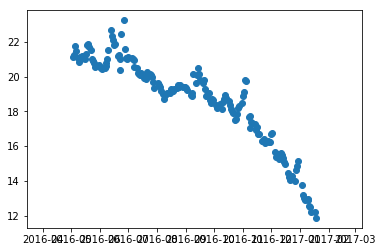

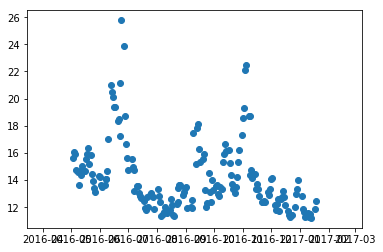

In [13]:
###merge VIX with other futures###
daily_return_VIX = pd.concat([pd.merge(data_daily_return.loc['VIX'], data_daily_return.loc[name], how='inner', on=['date']) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])
daily_return_VIX1 = daily_return_VIX
xnparray10 = np.array(daily_return_VIX1.loc['VXF7']['date'])
ynparray10 = np.array(daily_return_VIX1.loc['VXF7']['close_y'])
plt.scatter(xnparray10.tolist(), ynparray10.tolist())
plt.show()
xnparray11 = np.array(daily_return_VIX1.loc['VXF7']['date'])
ynparray11 = np.array(daily_return_VIX1.loc['VXF7']['close_x'])
plt.scatter(xnparray11.tolist(), ynparray11.tolist())
plt.show()

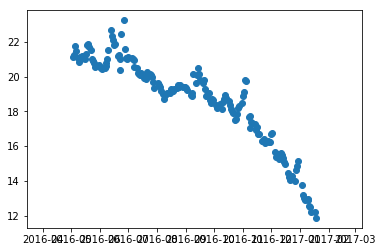

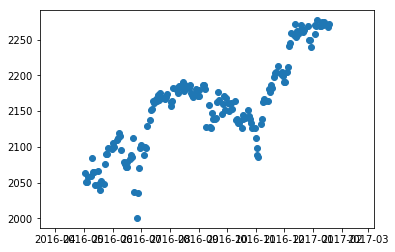

In [14]:
###merge SPX with other futures###
daily_return_SPX = pd.concat([pd.merge(data_daily_return.loc['SPX'], data_daily_return.loc[name], how='inner', on=['date']) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])
daily_return_SPX1 = daily_return_SPX
xnparray12 = np.array(daily_return_SPX1.loc['VXF7']['date'])
ynparray12 = np.array(daily_return_SPX1.loc['VXF7']['close_y'])
plt.scatter(xnparray12.tolist(), ynparray12.tolist())
plt.show()
xnparray13 = np.array(daily_return_SPX1.loc['VXF7']['date'])
ynparray13 = np.array(daily_return_SPX1.loc['VXF7']['close_x'])
plt.scatter(xnparray13.tolist(), ynparray13.tolist())
plt.show()

In [15]:
###select data when VIX return bigger than 20%###
daily_return_VIX_20 = pd.concat([daily_return_VIX.loc[name][daily_return_VIX.loc[name]['return_x'] > 0.2] for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

In [16]:
###select data when SPX return bigger than 2%###
daily_return_SPX_02 = pd.concat([daily_return_SPX.loc[name][daily_return_SPX.loc[name]['return_x'] > 0.02] for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

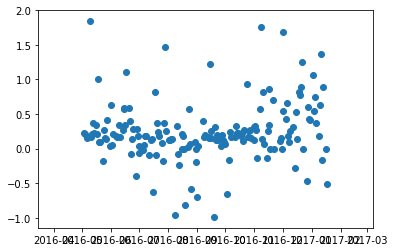

In [40]:
###calculate return ratio of VIX futures and VIX###
VIX_ratio_20 = pd.concat([pd.concat((daily_return_VIX_20.loc[name], (daily_return_VIX_20.loc[name, 'return_y']/daily_return_VIX_20.loc[name, 'return_x']).rename('returnratio')), axis = 1) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

VIX_ratio_200 = pd.concat([pd.concat((daily_return_VIX1.loc[name], (daily_return_VIX1.loc[name, 'return_y']/daily_return_VIX1.loc[name, 'return_x']).rename('returnratio')), axis = 1) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])


daily_return_VIX_20111 = pd.concat([VIX_ratio_200.loc[name][VIX_ratio_200.loc[name]['returnratio'] > -1] for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])
daily_return_VIX_20112 = pd.concat([daily_return_VIX_20111.loc[name][daily_return_VIX_20111.loc[name]['returnratio'] < 2] for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])



xnparray102 = np.array(daily_return_VIX_20112.loc['VXF7']['date'])
xnparray102 = xnparray102.tolist()
ynparray102 = np.array(daily_return_VIX_20112.loc['VXF7']['returnratio'])
ynparray102 = ynparray102.tolist()
plt.scatter(xnparray102, ynparray102)
plt.show()

In [18]:
###calculate return ratio of VIX futures and SPX###
SPX_ratio_20 = pd.concat([pd.concat((daily_return_SPX_02.loc[name], (daily_return_SPX_02.loc[name, 'return_y']/daily_return_SPX_02.loc[name, 'return_x']).rename('returnratio')), axis = 1) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

In [19]:
###read expiration date###
data_read1 = csv_data(csvfile2)
expirationdate = data_read1.read_csvdate_expiration()
expirationdate['date'] = pd.to_datetime(expirationdate['date'])
###transfer the date to datetime###
expirationdate['date'] = expirationdate['date'].dt.date

In [20]:
expirationdate = expirationdate.set_index('m_localSymbol')
expirationdate.index.name= None

In [21]:
###put the expiration date into dataframe###
VIX_ratio_20_exp = pd.concat([pd.concat((VIX_ratio_20.loc[name], (abs(expirationdate.loc[name]['date'] - VIX_ratio_20.loc[name]['date'])).rename('expirationdate')), axis = 1) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

In [22]:
###put the expiration date into dataframe###
SPX_ratio_20_exp = pd.concat([pd.concat((SPX_ratio_20.loc[name], (abs(expirationdate.loc[name]['date'] - SPX_ratio_20.loc[name]['date'])).rename('expirationdate')), axis = 1) for name in Symbols_futures], axis = 0, keys = [name for name in Symbols_futures])

In [23]:
###change the date type to int days###
VIX_ratio_20_exp['expirationdate'] = VIX_ratio_20_exp['expirationdate'].apply(lambda x: x.days)
SPX_ratio_20_exp['expirationdate'] = SPX_ratio_20_exp['expirationdate'].apply(lambda x: x.days)

In [24]:
###define the fitting function###
def exp_function1(x, m, b, c):
    return m*x**b+c

In [25]:
###define the fitting curve###
def fit_cur(xn, yn):
    popt, pcov = curve_fit(exp_function1, xn, yn, maxfev = 10000)
    return popt

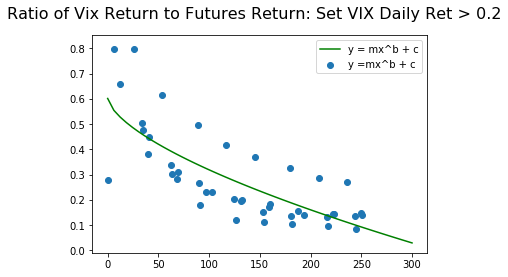

In [26]:
###plot VIX###
xnparray = np.array(VIX_ratio_20_exp['expirationdate'])
ynparray = np.array(VIX_ratio_20_exp['returnratio'])
i = 0
while i < 0:
    ynparray1 = exp_function1(xnparray, *fit_cur(xnparray, ynparray))
    error = np.absolute(np.subtract(ynparray1, ynparray))
    index = np.unravel_index(np.argmax(error), error.shape)
    xnparray = np.delete(xnparray, index)
    ynparray = np.delete(ynparray, index)
    i += 1
popt = fit_cur(xnparray, ynparray)
fig, ax = plt.subplots()
fig.suptitle('Ratio of Vix Return to Futures Return: Set VIX Daily Ret > 0.2', fontsize=16)
xx = np.linspace(0, 300, 50)
ax.scatter(xnparray.tolist(), ynparray.tolist(), label = "y =" + "mx^b + c")
ax.plot(xx, exp_function1(xx, *popt), 'g-', label= "y = mx^b + c")
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.legend()
plt.show()

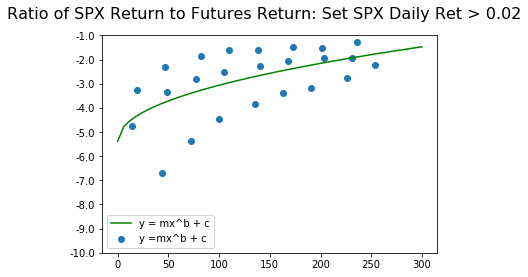

In [27]:
###plot SPX###
xnparray2 = np.array(SPX_ratio_20_exp['expirationdate'])
ynparray2 = np.array(SPX_ratio_20_exp['returnratio'])
i = 0
while i < 1:
    ynparray1 = exp_function1(xnparray2, *fit_cur(xnparray2, ynparray2))
    error = np.absolute(np.subtract(ynparray1, ynparray2))
    index = np.unravel_index(np.argmax(error), error.shape)
    xnparray2 = np.delete(xnparray2, index)
    ynparray2 = np.delete(ynparray2, index)
    i += 1
popt = fit_cur(xnparray2, ynparray2)
fig, ax = plt.subplots()
fig.suptitle('Ratio of SPX Return to Futures Return: Set SPX Daily Ret > 0.02', fontsize=16)
xx1 = np.linspace(0, 300, 50)
ax.scatter(xnparray2.tolist(), ynparray2.tolist(), label = "y =" + "mx^b + c")
ax.plot(xx, exp_function1(xx1, *popt), 'g-', label= "y = mx^b + c")
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(-10, 0, 1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.legend()
plt.show()